In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
from matplotlib.ticker import ScalarFormatter
from sklearn.preprocessing import PolynomialFeatures
from fbprophet import Prophet
from scipy.stats import norm
from scipy.integrate import odeint
from sklearn.metrics import mean_squared_error 

%matplotlib inline

/home/lenovo/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/home/lenovo/anaconda3/lib/python3.7/site-packages/IPython/utils/traitlets.py:5: UserWarning:

IPython.utils.traitlets has moved to a top-level traitlets package.



In [2]:
# confirmed_url = "https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
# deaths_url = "https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"
# recoverd_url = "https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv"

# df_confirmed = pd.read_csv(confirmed_url)
# df_deaths = pd.read_csv(deaths_url)
# df_recovered = pd.read_csv(recoverd_url)

In [405]:
curve = pd.read_csv('normalCurve.csv')

In [406]:
curve.iloc[120:140]

,Unnamed: 0,Actual New Cases,Date,Predicted New Cases
120,120,4387.0,2020-06-30,3510
121,121,3402.0,2020-07-01,3483
122,122,3383.0,2020-07-02,3453
123,123,4193.0,2020-07-03,3420
124,124,4128.0,2020-07-04,3385
125,125,3580.0,2020-07-05,3348
126,126,4207.0,2020-07-06,3308
127,127,3392.0,2020-07-07,3266
128,128,3036.0,2020-07-08,3221
129,129,3183.0,2020-07-09,3175


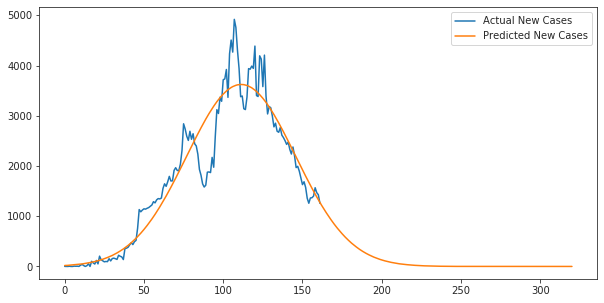

In [407]:
# curve[['Actual New Cases','Date','Predicted New Cases']].plot()

In [6]:
df_deaths

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/1/20,8/2/20,8/3/20,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20,8/9/20,8/10/20
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,1283,1284,1288,1288,1294,1298,1307,1312,1312,1328
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,161,166,172,176,182,188,189,193,199,200
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,1223,1231,1239,1248,1261,1273,1282,1293,1302,1312
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,52,52,52,52,52,52,52,52,52,52
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,54,55,58,59,62,64,67,70,75,78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,NaN,Sao Tome and Principe,0.186400,6.613100,0,0,0,0,0,0,...,15,15,15,15,15,15,15,15,15,15
262,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,494,497,499,506,508,508,512,512,515,518
263,NaN,Comoros,-11.645500,43.333300,0,0,0,0,0,0,...,7,7,7,7,7,7,7,7,7,7
264,NaN,Tajikistan,38.861000,71.276100,0,0,0,0,0,0,...,60,61,61,61,61,62,62,62,62,62


In [7]:
df_recovered

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/1/20,8/2/20,8/3/20,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20,8/9/20,8/10/20
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,25509,25510,25669,25669,25742,25840,25903,25960,25960,26228
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,2961,3018,3031,3031,3123,3155,3227,3268,3342,3379
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,20988,21419,21901,22375,22802,23238,23667,24083,24506,24920
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,807,807,821,825,825,828,839,839,839,839
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,460,461,476,503,506,520,544,564,567,569
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,NaN,Sao Tome and Principe,0.186400,6.613100,0,0,0,0,0,0,...,782,787,787,794,795,797,799,800,800,800
249,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,862,862,863,863,894,898,907,910,913,915
250,NaN,Comoros,-11.645500,43.333300,0,0,0,0,0,0,...,330,330,330,340,340,340,353,369,369,369
251,NaN,Tajikistan,38.861000,71.276100,0,0,0,0,0,0,...,6233,6276,6317,6356,6399,6443,6484,6484,6484,6614


In [8]:
df_confirmed_sa=df_confirmed.loc[df_confirmed['Country/Region'].str.lower() == 'saudi arabia']
df_recovered_sa=df_recovered.loc[df_recovered['Country/Region'].str.lower() == 'saudi arabia']
df_deaths_sa=df_deaths.loc[df_deaths['Country/Region'].str.lower() == 'saudi arabia']

In [9]:
df_confirmed_sa

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/1/20,8/2/20,8/3/20,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20,8/9/20,8/10/20
192,NaN,Saudi Arabia,23.885942,45.079162,0,0,0,0,0,0,...,277478,278835,280093,281456,282824,284226,285793,287262,288690,289947


In [10]:
df_recovered_sa

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/1/20,8/2/20,8/3/20,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20,8/9/20,8/10/20
190,NaN,Saudi Arabia,23.885942,45.079162,0,0,0,0,0,0,...,237548,240081,242055,243713,245314,247089,248948,250440,252039,253478


In [11]:
df_deaths_sa

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/1/20,8/2/20,8/3/20,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20,8/9/20,8/10/20
192,NaN,Saudi Arabia,23.885942,45.079162,0,0,0,0,0,0,...,2887,2917,2949,2984,3020,3055,3093,3130,3167,3199


In [12]:
df_confirmed_saT=df_confirmed_sa.T[5:]
df_confirmed_saT=df_confirmed_saT.rename(columns={df_confirmed_saT.columns[0]: 'Confirmed'})

df_recovered_saT=df_recovered_sa.T[5:]
df_recovered_saT=df_recovered_saT.rename(columns={df_recovered_saT.columns[0]: 'Recovered'})

df_deaths_saT=df_deaths_sa.T[5:]
df_deaths_saT=df_deaths_saT.rename(columns={df_deaths_saT.columns[0]: 'Deaths'})

In [13]:
result = pd.concat([df_confirmed_saT,df_recovered_saT,df_deaths_saT], axis=1, sort=False)

result['active'] = result['Confirmed'] - result['Deaths'] - result['Recovered']

In [14]:
result["new_cases"] = result["Confirmed"].diff()
result["new_Recovered"] = result["Recovered"].diff()

In [15]:
result.index.names = ['Date']
result=result.reset_index()
# result=result.rename(columns={result.columns[0]: 'Confirmed', result.columns[1]: 'Deaths', result.columns[2]: 'Recovered' })

In [16]:
result

,Date,Confirmed,Recovered,Deaths,active,new_cases,new_Recovered
0,1/23/20,0,0,0,0,NaN,NaN
1,1/24/20,0,0,0,0,0,0
2,1/25/20,0,0,0,0,0,0
3,1/26/20,0,0,0,0,0,0
4,1/27/20,0,0,0,0,0,0
...,...,...,...,...,...,...,...
196,8/6/20,284226,247089,3055,34082,1402,1775
197,8/7/20,285793,248948,3093,33752,1567,1859
198,8/8/20,287262,250440,3130,33692,1469,1492
199,8/9/20,288690,252039,3167,33484,1428,1599


Text(0, 0.5, 'Number of cases')

<Figure size 432x288 with 0 Axes>

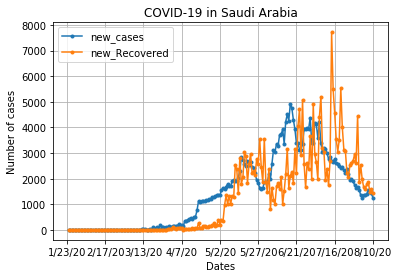

In [17]:
fig = plt.figure()
result.set_index('Date')[['new_cases','new_Recovered']].plot(style='.-',legend=True, grid=True)
plt.title("COVID-19 in Saudi Arabia")
plt.xlabel("Dates")
plt.ylabel("Number of cases")

In [18]:
result["Date"]= pd.to_datetime(result["Date"]) 

In [19]:
def plot(x, y, realX, realY, name):
    df = pd.DataFrame({'date': X, 'Confirmed': y.astype(np.int32)})
    df['date'] = pd.to_datetime(df['date'])

    fig = plt.figure()
    ax = plt.axes()
    plt.plot(realX, realY, 'r', alpha=1 ,label='Confirmed Cases')
    df.set_index('date')['Confirmed'].plot(legend=True, grid=True, alpha=0.5,label='Predicted Cases')
    plt.title("COVID-19 in Saudi Arabia ("+name+")")
    plt.xlabel("Date")
    plt.ylabel("Number of cases")
    
    h1 =mpatches.Patch(color='blue', label='Predicted Cases')
    h2 = mpatches.Patch(color='red', label='Confirmed Cases')
    plt.legend(handles=[h1, h2])

In [20]:
import datetime

days = 60
dfConfirmed = result[result['Confirmed'] != 0]

Xdata = np.arange(0, len(dfConfirmed['Date']))
Ydata = dfConfirmed['Confirmed']

predictX = np.arange(0, len(Xdata) + days)

xCases = dfConfirmed['Date']
yCases = dfConfirmed['Confirmed']

predictedDays = pd.date_range(dfConfirmed['Date'].iloc[-1] + datetime.timedelta(days=1), periods=days, freq='D')
X = np.append(dfConfirmed['Date'], predictedDays)

In [21]:
# 
# ! pip3 install fbprophet

In [22]:
polynomialFeatures = PolynomialFeatures(degree = 2)
XPoly = polynomialFeatures.fit_transform(Xdata.reshape(-1, 1))

from sklearn.linear_model import LinearRegression
polyLinearRegression = LinearRegression()
polyLinearRegression.fit(XPoly, Ydata)

XPoly = polynomialFeatures.fit_transform(predictX.reshape(-1, 1))
y = polyLinearRegression.predict(XPoly).astype(int)
miny = min(y)
y = y + miny * -1

In [23]:
dfConfirmed

,Date,Confirmed,Recovered,Deaths,active,new_cases,new_Recovered
39,2020-03-02,1,0,0,1,1,0
40,2020-03-03,1,0,0,1,0,0
41,2020-03-04,1,0,0,1,0,0
42,2020-03-05,5,0,0,5,4,0
43,2020-03-06,5,0,0,5,0,0
...,...,...,...,...,...,...,...
196,2020-08-06,284226,247089,3055,34082,1402,1775
197,2020-08-07,285793,248948,3093,33752,1567,1859
198,2020-08-08,287262,250440,3130,33692,1469,1492
199,2020-08-09,288690,252039,3167,33484,1428,1599


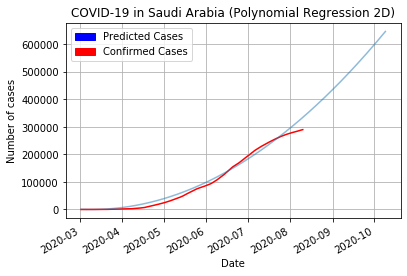

In [24]:
plot(X, y, xCases, yCases, "Polynomial Regression 2D")

In [25]:
import matplotlib
def plotseir(t, S, I, R, XReal, yReal, E=None):
    f, ax = plt.subplots(1,1,figsize=(15,10))
    num = [1000000,2000000,3000000,4000000,5000000,6000000,7000000,8000000,9000000,10000000]
    ax.plot(t, S, 'w', alpha=0.7, linewidth=2)
    #if E is not None:
     #   ax.plot(t, E, 'y', alpha=0.7, linewidth=2, label='Exposed')
    ax.plot(t, I, 'b', alpha=1., linewidth=2, label='Predicted')
    ax.plot(XReal, yReal, 'r', alpha=0.9, lw=2, label='Actual')

    ax.plot(t, R, 'w', alpha=0.01, linewidth=2)

    ax.set_xlabel('Time (days)')

    ax.yaxis.set_tick_params(length=0)
    ax.xaxis.set_tick_params(length=0)
    
    ax.grid(b=True, which='major', c='w', lw=2, ls='-')
    ax.set_ylim(0,10000000)
    y_formatter = matplotlib.ticker.ScalarFormatter(useOffset=False)
#     matplotlib.rcParams['axes.formatter.useoffset'] = False
    ax.yaxis.set_major_formatter(y_formatter)
    
    legend = ax.legend(borderpad=2.0)
    legend.get_frame().set_alpha(0.5)
    for spine in ('top', 'right', 'bottom', 'left'):
        ax.spines[spine].set_visible(False)
    
    plt.yticks();

In [26]:
dfConfirmed['Date'][:10]
# dfConfirmed['Date'].index(10)

39   2020-03-02
40   2020-03-03
41   2020-03-04
42   2020-03-05
43   2020-03-06
44   2020-03-07
45   2020-03-08
46   2020-03-09
47   2020-03-10
48   2020-03-11
Name: Date, dtype: datetime64[ns]

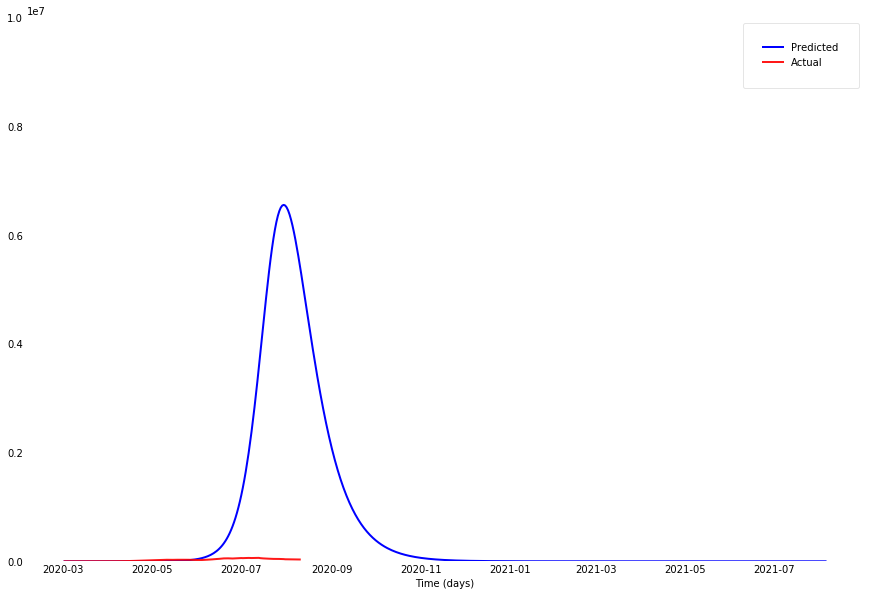

In [27]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import datetime

days = 360

dfConfirmed = result[result['active'] != 0]

xCases = dfConfirmed['Date']
yCases = dfConfirmed['active']

predictedDays = pd.date_range(dfConfirmed['Date'].iloc[-1] + datetime.timedelta(days=1), periods=days, freq='D')
X = np.append(dfConfirmed['Date'], predictedDays)


# Total population, N.
N = 30000000
# Initial number of infected and recovered individuals, I0 and R0.
I0, R0 = dfConfirmed['active'].iloc[0], dfConfirmed['Recovered'].iloc[0] 
# Everyone else, S0, is susceptible to infection initially.
S0 = N - I0 - R0
# Contact rate, beta, and mean recovery rate, gamma, (in 1/days).
beta, gamma = .2, 1./12

# A grid of time points (in days)
t = np.linspace(0, len(X), len(X))
# n_days = 100
# t = np.linspace(0, n_days, n_days)

# The SIR model differential equations.
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

# Initial conditions vector
y0 = S0, I0, R0
# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T
plotseir(X, S, I, R,xCases,yCases)

# matplotlib.rcParams['axes.formatter.useoffset'] = False
# plt.rcParams["figure.figsize"] = [15, 10]
# # plotGraph(X, I, XRealCases, yRealCases, "SIR")
# fig = plt.figure(facecolor='w')
# ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
# ax.plot(X, S/30000000, 'b', alpha=0.5, lw=2, label='Susceptible')
# ax.plot(X, I/30000000, 'r', alpha=0.5, lw=2, label='Infected')
# ax.plot(X, R/30000000, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
# ax.plot(xCases, yCases/30000000, 'r', alpha=0.5, lw=2, label='Actual')
# ax.set_xlabel('Time /days')
# ax.set_ylabel('Number (30,000,000)')
# # ax.set_ylim(0,1.2)
# ax.yaxis.set_tick_params(length=0)
# ax.xaxis.set_tick_params(length=0)
# ax.grid(b=True, which='major', c='w', lw=2, ls='-')
# legend = ax.legend()
# legend.get_frame().set_alpha(0.5)
# for spine in ('top', 'right', 'bottom', 'left'):
#     ax.spines[spine].set_visible(False)
# plt.show()

In [28]:
# The SEIR model differential equations.
def deriv2(y, t, N, beta, gamma, delta):
    S, E, I, R = y
    dSdt = -beta * S * I / N
    dEdt = beta * S * I / N - delta * E
    dIdt = delta * E - gamma * I
    dRdt = gamma * I
    return dSdt, dEdt, dIdt, dRdt

In [29]:
N = 30000000 # population
beta = .15  # infected person infects 1 other person per day
D = 14 # infections lasts 10 days
gamma = 1.0 / D
delta = 1.0 / 5.2  # incubation period of  days

#  initial conditions: one exposed, rest susceptible
I0, R0 , E0 = dfConfirmed['active'].iloc[0], 0, 1

S0 = N - I0 - R0 - E0

(29999998, 1, 1, 0)


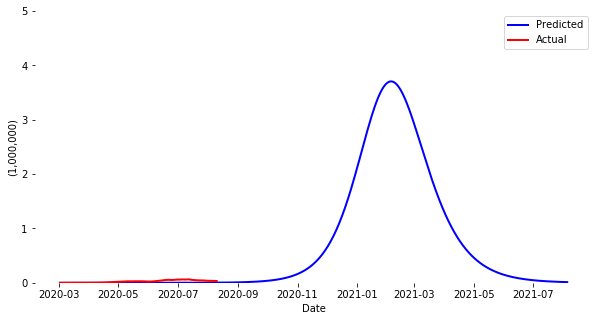

In [30]:
y0 = S0, E0, I0, R0 # Initial conditions vector
print(y0)
t = np.linspace(0, (len(X)), (len(X)))
# print(t)
# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv2, y0, t, args=(N, beta, gamma, delta))
S, E, I, R = ret.T



plt.rcParams["figure.figsize"] = [10, 5]
# plotGraph(X, I, XRealCases, yRealCases, "SIR")
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111,  axisbelow=True)
# ax.plot(X, S/1000000, 'w',  )
ax.plot(X, I/1000000, 'b', alpha=1., lw=2, label='Predicted')
# ax.plot(X, R/1000000, 'w',  )
ax.plot(xCases, yCases/1000000, 'r', alpha=1., lw=2, label='Actual')
ax.set_xlabel('Date')
ax.set_ylabel('(1,000,000)')
# matplotlib.rcParams['axes.formatter.useoffset'] = False
y_formatter = matplotlib.ticker.ScalarFormatter(useOffset=False)
ax.yaxis.set_major_formatter(y_formatter)

ax.set_ylim(0,5)
# ax.yaxis.set_tick_params(length=0)
# ax.xaxis.set_tick_params(length=0)
# ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
# legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

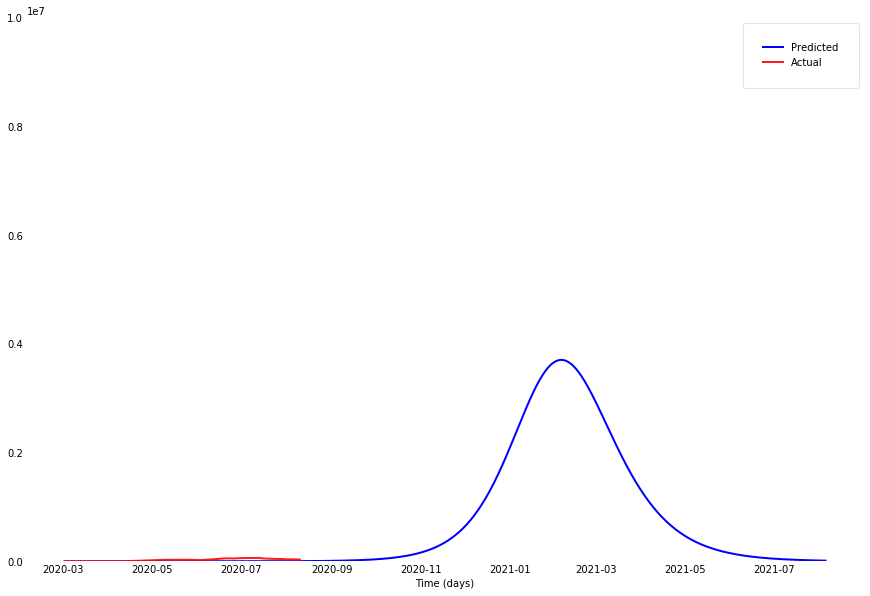

In [31]:
plotseir(X, S, I, R,xCases,yCases,E)

In [32]:
confirmed = dfConfirmed[['Date','Confirmed']]
confirmed["Date"]= pd.to_datetime(confirmed["Date"]) 
confirmed=confirmed.rename(columns={confirmed.columns[0]: 'ds', confirmed.columns[1]: 'y'})

/home/lenovo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [33]:
confirmed

,ds,y
39,2020-03-02,1
40,2020-03-03,1
41,2020-03-04,1
42,2020-03-05,5
43,2020-03-06,5
...,...,...
196,2020-08-06,284226
197,2020-08-07,285793
198,2020-08-08,287262
199,2020-08-09,288690


In [34]:
prediction_size = 7
train_df = confirmed[:-prediction_size]
train_df.tail()

,ds,y
189,2020-07-30,274219
190,2020-07-31,275905
191,2020-08-01,277478
192,2020-08-02,278835
193,2020-08-03,280093


In [35]:
m = Prophet()
m.fit(confirmed)
future = m.make_future_dataframe(periods=14)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
171,2020-08-20
172,2020-08-21
173,2020-08-22
174,2020-08-23
175,2020-08-24


In [36]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(12)

,ds,yhat,yhat_lower,yhat_upper
164,2020-08-13,302458.993050,300418.043272,304507.628226
165,2020-08-14,304708.839193,302520.477922,306856.673619
166,2020-08-15,306891.593157,304731.715002,309161.209123
167,2020-08-16,309044.172881,306630.659854,311163.985045
168,2020-08-17,311169.965575,308842.864150,313683.075020
169,2020-08-18,313505.413842,310803.425905,316218.069833
170,2020-08-19,315567.813398,312453.199232,318488.662024
171,2020-08-20,317716.379667,314408.328687,321013.365888
172,2020-08-21,319966.225809,316460.309966,323469.834618
173,2020-08-22,322148.979773,318070.082994,325939.568034


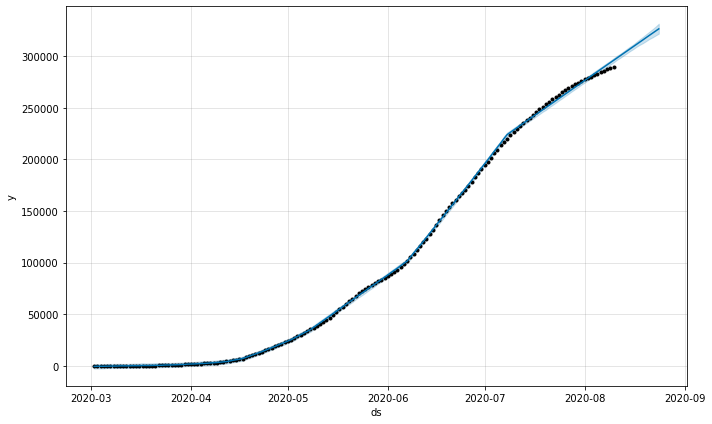

In [37]:
fig1 = m.plot(forecast)
# plotGraph(forecast['ds'], forecast['yhat'], XRealCases, yRealCases, "prophet")

In [38]:
# plotGraph(forecast['ds'], forecast['yhat'], XRealCases, yRealCases, "prophet")

In [39]:
def make_comparison_dataframe(historical, forecast):
    """Join the history with the forecast.
    
       The resulting dataset will contain columns 'yhat', 'yhat_lower', 'yhat_upper' and 'y'.
    """
    return forecast.set_index('ds')[['yhat', 'yhat_lower', 'yhat_upper']].join(historical.set_index('ds'))

In [40]:
cmp_df = make_comparison_dataframe(confirmed, forecast)
cmp_df.tail(10)

,yhat,yhat_lower,yhat_upper,y
ds,,,,
2020-08-15,306891.593157,304731.715002,309161.209123,NaN
2020-08-16,309044.172881,306630.659854,311163.985045,NaN
2020-08-17,311169.965575,308842.864150,313683.075020,NaN
2020-08-18,313505.413842,310803.425905,316218.069833,NaN
2020-08-19,315567.813398,312453.199232,318488.662024,NaN
2020-08-20,317716.379667,314408.328687,321013.365888,NaN
2020-08-21,319966.225809,316460.309966,323469.834618,NaN
2020-08-22,322148.979773,318070.082994,325939.568034,NaN
2020-08-23,324301.559498,319952.646650,328552.537994,NaN


In [41]:
def calculate_forecast_errors(df, prediction_size):
    """Calculate MAPE and MAE of the forecast.
    
       Args:
           df: joined dataset with 'y' and 'yhat' columns.
           prediction_size: number of days at the end to predict.
    """
    
    # Make a copy
    df = df.copy()
    index=pd.isnull(cmp_df).any(1).nonzero()[0][0]
    df = df[:index]
#     df = df[df['y'] is not None]
    # Now we calculate the values of e_i and p_i according to the formulas given in the article above.
    df['e'] = df['y'] - df['yhat']
    df['p'] = 100 * df['e'] / df['y'] 
    
    # Now cut out the part of the data which we made our prediction for.
    predicted_part = df[-prediction_size:]
    
    # Define the function that averages absolute error values over the predicted part.
    error_mean = lambda error_name: np.mean(np.abs(predicted_part[error_name]))
    
    # Now we can calculate MAPE and MAE and return the resulting dictionary of errors.
    return {'MAPE': error_mean('p'), 'MAE': error_mean('e')}

In [42]:
# for err_name, err_value in calculate_forecast_errors(cmp_df, prediction_size).items():
#     print(err_name, err_value)

In [43]:
# import numpy as np
# from scipy.stats import norm
# import matplotlib.pyplot as plt



# # Generate some data for this demonstration.
# # data = norm.rvs(dfConfirmed['new_cases'])
# data = np.array(dfConfirmed['new_cases'], dtype=float)
# # Fit a normal distribution to the data:
# mu, std = norm.fit(data)

# # Plot the histogram.
# plt.hist(data, bins=50, density=True, alpha=0.6, color='g')

# # Plot the PDF.
# xmin, xmax = plt.xlim()
# x = np.linspace(xmin, xmax, 100)
# p = norm.pdf(x, mu, std)
# plt.plot(x, p, 'k', linewidth=2)
# title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
# plt.title(title)

# plt.show()

In [44]:
data = np.array(result['new_cases'], dtype = float)
data[0] = 0

mu, std = norm.fit(data)

print(mu,std)
# type (dfConfirmed['new_cases'].values)
# dfConfirmed['new_cases'].values
# data

1442.5223880597016 1400.051896957892


In [45]:
'''
Gaussian function: f(x) = a * e^(-0.5 * ((x-μ)/σ)**2)
'''
def f(x):
    # random parameters
    return 5000 * np.exp(-0.5 * ((x-90)/24)**2)

y_gaussian = f(x=np.arange(len(dfConfirmed)))

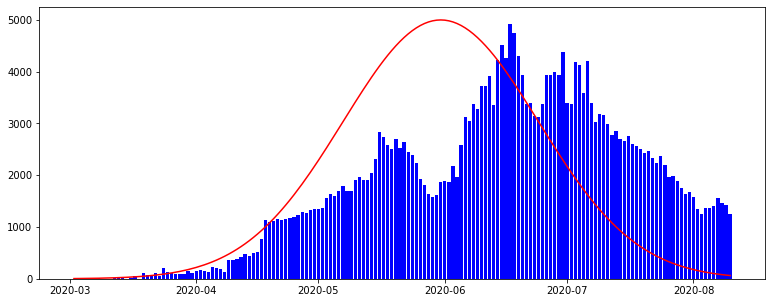

In [46]:
fig, ax = plt.subplots(figsize=(13,5))
ax.bar(dfConfirmed["Date"], dfConfirmed["new_cases"].values, color="b")
ax.plot(dfConfirmed["Date"], y_gaussian, color="red")
plt.show()

In [47]:
# dfConfirmed


In [48]:
from seirsplus.models import *
# ! pip3 install seirsplus

In [49]:
model = SEIRSModel(beta=0.155, sigma=1/3.2, gamma=1/12.39, initN=30000000, initI=1,
                   beta_D=0.100, sigma_D=1/4.0, gamma_D=1/9.0, theta_E=0.02, theta_I=0.02, psi_E=1.0, psi_I=1.0)

In [50]:
# model = SEIRSModel(initN   =30000000,
#                    beta    =.147, 
#                    sigma   =1/5.2, 
#                    gamma   =1/12.39, 
#                    mu_I    =0.0004,
#                    mu_0    =0, 
#                    nu      =0, 
#                    xi      =0,
#                    beta_D  =.147, 
#                    sigma_D =1/5.2, 
#                    gamma_D =1/12.39, 
#                    mu_D    =0.0004,
#                    theta_E =0, 
#                    theta_I =0, 
#                    psi_E   =1.0, 
#                    psi_I   =1.0,
#                    initI   =50000, 
#                    initE   =0, 
#                    initD_E =0, 
#                    initD_I =0, 
#                    initR   =0, 
#                    initF   =0)

In [51]:
checkpoints = {'t':       [10, 30], 
               'beta':    [0.1, 0.155], 
               'theta_E': [0.02, 0.02]
              }

In [52]:
model.run(T=700, checkpoints=checkpoints)
# model.run(T=500)

[Checkpoint: Updating parameters]
t = 9.90
[Checkpoint: Updating parameters]
t = 29.90


True

In [53]:
# type(model.total_num_infections())
# model.total_num_infections().tolist()

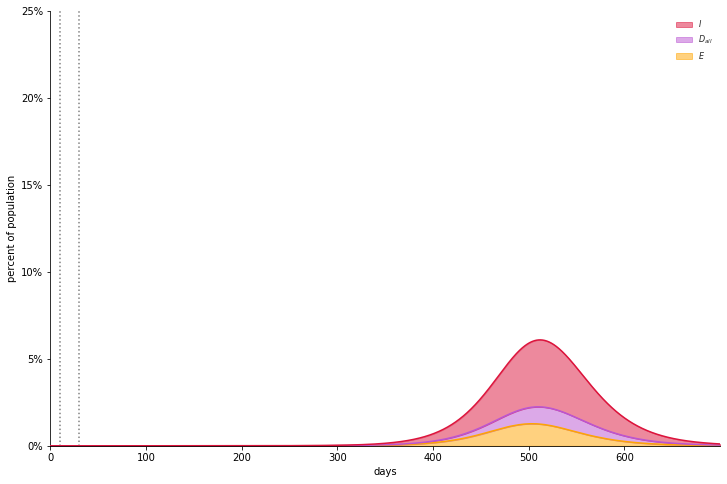

(<Figure size 864x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f333c7243c8>)

In [54]:
model.figure_infections(vlines=checkpoints['t'], ylim=0.25)
# model.figure_infections(ylim=0.25)

In [55]:
from scipy.optimize import minimize
from datetime import datetime, timedelta

In [82]:
# gaussian dist.
# type(d_full[:len(data)])
# type(d_full)
# matplotlib.__version__
#3.1.1 matplotlip version
# type(d_full[:len(data)])
# date_strings = [d.strftime('%m-%d-%Y') for d in d_full]

datetime.datetime(2020, 5, 17, 0, 0)

In [396]:
# start_date = datetime.strptime(start, '%b %d')
# test=dfConfirmed['new_cases']
# data = np.nan_to_num(np.array(test).astype(float))
# x_val = list(range(len(data)))


start_date = datetime.datetime(2020, 3, 2)
# data = [0,0,0,0,0,20,0,0,18,4,3,0,3,5,7,25,24,34,63,98,116,106,163,290,307,329,553,587,843,983,1748,2949,4569,5632,4825,9400,10311,11166,13451,17388,18743,19452,19913,20732,24914,26619,30107,32398,34196,25316,31107,33460,31935]
dfConfirmed2 = dfConfirmed['new_cases']
dfConfirmed2

# Preprocessing
# start_date = datetime.strptime(start, '%s %b %d')
data = np.nan_to_num(np.array(dfConfirmed2).astype(float))
x_val = list(range(len(data)))


In [397]:
# Fit normal distribution by minimizing sum-of-square-error
def fit(params):
    mean, std, height = params
    y = norm.pdf(x_val, mean, std) * height
    return np.square(data - y[:len(data)]).sum() # SSE

param0 = [x_val[-1], len(data), max(data)]
res = minimize(fit, param0, method='nelder-mead', options={'xatol': 1e-7, 'disp': True})

mean, std, height = res.x
np.array([mean, std, height]).round(2)

Optimization terminated successfully.
         Current function value: 28162436.615003
         Iterations: 257
         Function evaluations: 491


array([1.1134000e+02, 3.4360000e+01, 3.1208587e+05])

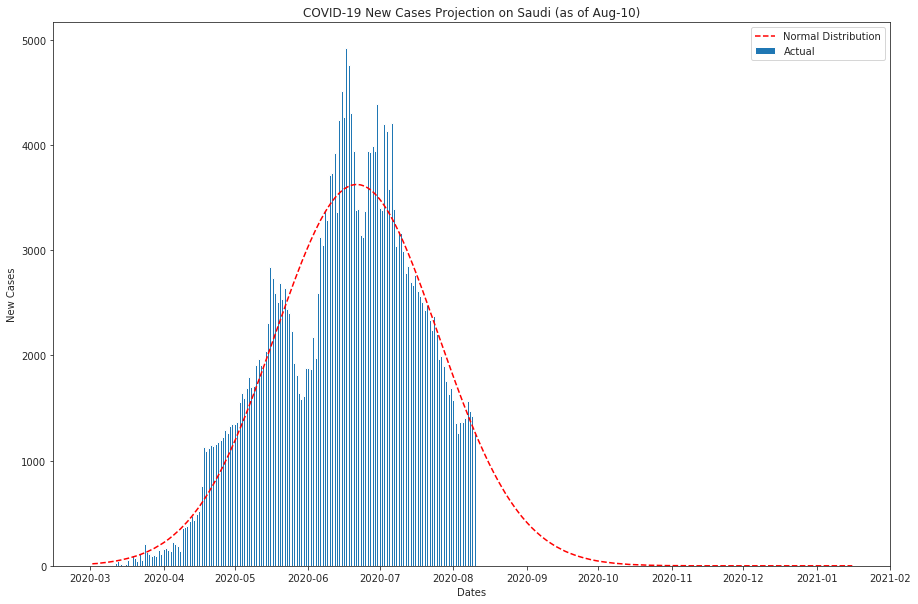

In [398]:
# X-axis and Dates
x_full = list(range(data.argmax()*3))
d_full = [start_date + timedelta(days=x) for x in x_full]
# as_of_date = datetime.strftime(d_full[len(data)-1], '%b-%d')

# Forecast based on fit
y_line = (norm.pdf(x_full, mean, std) * height).astype(int)
y_bar = y_line.copy()
y_bar[:len(data)] = 0

# Find 99th percentile
s = y_line.sum() * .99
i = 0
c = 0
while c < s:
    c += y_line[i] if i >= len(data) else data[i]
    i += 1
d_percentile = d_full[i-1]

# Plot
fig, ax = plt.subplots(figsize=(15,10))

ax.bar(d_full[:len(data)], data, label='Actual')
# ax.bar(d_full, y_bar, color='bisque', label='Projected')
ax.plot(d_full, y_line, 'r--', label='Normal Distribution')

plt.title('COVID-19 New Cases Projection on Saudi (as of {})'.format(as_of_date))
plt.xlabel('Dates')
plt.ylabel('New Cases')
plt.legend()

plt.show()

# print('Current Actual: {:,.0f}'.format(sum(data)))
# print('Total with Projected: {:,.0f}'.format(sum(data) + sum(y_line[len(data):])))
# print('99% Cases Before: {}'.format(datetime.strftime(d_full[i], '%b-%d')))

In [372]:
# # X-axis and Dates
# x_full = list(range(data.argmax()*4))
# d_full = [dfConfirmed['Date'].iloc[0] + timedelta(days=x) for x in x_full]
# as_of_date = datetime.strftime(d_full[len(data)-1], '%b-%d')

# d_full = pd.to_datetime(d_full)

# # Forecast based on fit
# y_line = (norm.pdf(x_full, mean, std) * height).astype(int)
# y_bar = y_line.copy()
# y_bar[:len(data)] = 0

# # Find the percentile
# percentile = 0.97
# s = y_line.sum() * percentile
# i = 0
# c = 0
# while c < s:
#     c += y_line[i] if i >= len(data) else data[i]
#     i += 1
# d_percentile = d_full[i-1]

# # Plot
# fig, ax = plt.subplots(figsize=(10,5))
# ax.bar(d_full[:len(data)], data, color='b',label='Actual')
# # ax.bar(d_full, y_bar, color='black', label='Projected')
# ax.plot(d_full, y_line, 'r--', label='Normal Distribution')

# plt.title('COVID-19 New Cases Projection on Saudi Arabia')
# plt.xlabel('Date')
# plt.ylabel('New Cases')


# plt.show()

# print('Current Actual: {:,.0f}'.format(sum(data)))
# print('Total with Projected: {:,.0f}'.format(sum(data) + sum(y_line[len(data):])))
# print('{} % Cases Before: {}'.format(percentile,datetime.strftime(d_full[i], '%b-%d')))

In [373]:
# df.loc[df['Date']==d_full[len(data)-1]]
# date_list = [base - datetime.timedelta(days=x) for x in range(1)]
# date_list


In [377]:
# for i in d_full:
#     idx = d_full[len(data)-1]
#     date_list = [idx + datetime.timedelta(days=x) for x in range(10)]
#     break
# date_list
# # d_full==d_full[len(data)-1]


In [399]:
prediction = pd.DataFrame([data,d_full, y_line])

In [400]:
# df.tail()
normalCurve=prediction.T

In [401]:
normalCurve

,0,1,2
0,1,2020-03-02,19
1,0,2020-03-03,20
2,0,2020-03-04,22
3,4,2020-03-05,25
4,0,2020-03-06,27
...,...,...,...
316,None,2021-01-12,0
317,None,2021-01-13,0
318,None,2021-01-14,0
319,None,2021-01-15,0


In [402]:
normalCurve=normalCurve.rename(columns={normalCurve.columns[0]: 'Actual New Cases',normalCurve.columns[1]: 'Date', normalCurve.columns[2]: 'Predicted New Cases'})

In [380]:
idx = normalCurve[normalCurve['Actual New Cases'].isnull() == True].index.tolist()[0]
normalCurve = normalCurve[:idx]
y_pred = normalCurve['Predicted New Cases']
y_true = normalCurve['Actual New Cases']
# y_pred

In [352]:
# print(y_pred)
# print(y_true)
# normalCurve=normalCurve[normalCurve['Predicted New Cases']!=0]

In [403]:
normalCurve.iloc[150:200]

,Actual New Cases,Date,Predicted New Cases
150,1629,2020-07-30,1923
151,1686,2020-07-31,1861
152,1573,2020-08-01,1798
153,1357,2020-08-02,1737
154,1258,2020-08-03,1676
155,1363,2020-08-04,1616
156,1368,2020-08-05,1556
157,1402,2020-08-06,1498
158,1567,2020-08-07,1440
159,1469,2020-08-08,1384


In [366]:
normalCurve

,Actual New Cases,Date,Predicted New Cases
0,1,2020-02-03,19.0139
1,1,2020-02-04,20.8856
2,1,2020-02-05,22.922
3,5,2020-02-06,25.1357
4,5,2020-02-07,27.5398
...,...,...,...
316,None,2020-12-15,7.15434e-05
317,None,2020-12-16,6.01306e-05
318,None,2020-12-17,5.04956e-05
319,None,2020-12-18,4.23685e-05


In [404]:
# normalCurve.to_csv('normalCurve.csv')
# mean_squared_error(y_true,y_pred) 

In [99]:
# len(data)

162

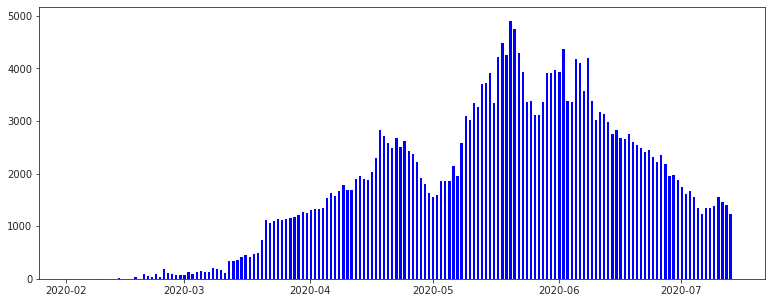

In [101]:
fig, ax = plt.subplots(figsize=(13,5))
ax.bar(d_full[:len(data)], data, color="b")
# ax.plot(dfConfirmed["Date"], y_gaussian, color="red")
plt.show()

In [102]:
from pygrowthmodels import generalised_richard
from scipy.optimize import curve_fit
from datetime import datetime, date, time, timedelta

In [103]:
df = result[['Date','new_cases','Confirmed']]

In [104]:
df = df[df['Confirmed'] != 0]
df = df.reset_index()
df = df.rename(columns={df.columns[0]: 't'})

df = df.iloc[1:]
df

,t,Date,new_cases,Confirmed
1,40,2020-03-03,0,1
2,41,2020-03-04,0,1
3,42,2020-03-05,4,5
4,43,2020-03-06,0,5
5,44,2020-03-07,0,5
...,...,...,...,...
157,196,2020-08-06,1402,284226
158,197,2020-08-07,1567,285793
159,198,2020-08-08,1469,287262
160,199,2020-08-09,1428,288690


In [105]:
import datetime
from scipy.stats import linregress
from scipy import stats

x_seq = np.arange(df['Date'].size)
df['new_cases'] = df['new_cases'].astype(float)
fit = np.polyfit(x_seq, df['new_cases'], 1)

fit[0]

20.682878997009432

In [106]:
#Time
days = 325
predictedDays = pd.date_range(df['Date'].iloc[-1] + datetime.timedelta(days=1), periods=days, freq='D')
X = np.append(df['Date'], predictedDays)

In [107]:
def richard(time, alpha, beta, rate, slope):
    """
    Computes the Richard growth model
    Parameters
    ----------
    time : time
    alpha : upper asymptote
    beta : growth range
    rate : growth rate
    slope : slope of growth
    See Also
    --------
    richard_inverse
    References
    ----------
    .. [1] D. Fekedulegn, M. Mac Siurtain, and J. Colbert, "Parameter estimation
           of nonlinear growth models in forestry," Silva Fennica, vol. 33, no.
           4, pp. 327-336, 1999.
    """

    result = (1 + beta * np.exp(-rate * time))
    for i in range (len(result)):
        if (result[i] < 0) & ( slope > 1):
            result = float('nan')
    else:

        result = result ** (1 / slope)

        result = alpha / result
        

    return result

In [108]:
# def richard_inverse(size, alpha, beta, rate, slope):

#     """

#     Computes the inverse of Richard growth model



#     Parameters

#     ----------

#     size : size

#     alpha : upper asymptote

#     beta : growth range

#     rate : growth rate

#     slope : slope of growth



#     See Also

#     --------

#     richard



#     References

#     ----------

#     .. [1] A. Khamiz, Z. Ismail, and A. T. Muhammad, "Nonlinear growth models

#            for modeling oil palm yield growth," Journal of Mathematics and

#            Statistics, vol. 1, no. 3, p. 225, 2005.

#     """



#     result = -np.log(((alpha / size) ** slope - 1) / beta) / rate



#     return result

In [109]:
def generalised_richard(time, A, U, k, m, beta, t0=0):
    """
    Computes the Generalised Richard growth model
    Parameters
    ----------
    time : time
    A : the lower asymptote
    U : the upper asymptote
    k : growth range
    m : slope of growth
    beta : growth range
    t0 : time shift (default 0)
    See Also
    --------
    generalised_richard_inverse
    References
    ----------
    .. [1] D. Fekedulegn, M. Mac Siurtain, and J. Colbert, "Parameter estimation
           of nonlinear growth models in forestry," Silva Fennica, vol. 33, no.
           4, pp. 327-336, 1999.
    """
    
    result = A + richard(time - t0, U - A, beta, k, m)

    return result

In [110]:
# def generalised_richard_inverse(size, A, U, k, m, beta, t0=0):

#     """

#     Computes the inverse of Generalised Richard growth model



#     Parameters

#     ----------

#     size : size

#     A : the lower asymptote

#     U : the upper asymptote

#     k : growth range

#     m : slope of growth

#     beta : growth range

#     t0 : time shift (default 0)



#     See Also

#     --------

#     generalised_richard



#     References

#     ----------

#     .. [1] A. Khamiz, Z. Ismail, and A. T. Muhammad, "Nonlinear growth models

#            for modeling oil palm yield growth," Journal of Mathematics and

#            Statistics, vol. 1, no. 3, p. 225, 2005.

#     """



#     result = richard_inverse(size - A, U - A, beta, k, m) + t0



#     return result

In [111]:
# t = np.linspace(0, len(dfConfirmed2), len(dfConfirmed2))

In [112]:
popt, pcov = curve_fit(generalised_richard, df.index.values, df.Confirmed.values, method='lm', maxfev=8000)

/home/lenovo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning:

invalid value encountered in power



In [113]:
popt

array([-6.70287605e+03,  3.16206416e+05,  4.99964078e-02,  1.24141342e+00,
        1.34568676e+01,  6.46098417e+01])

In [114]:
# a, b, c , d, f, g= popt

In [115]:
# pred = generalised_richard(df.index,a,b,c,d,f,g)

In [116]:
# days = 180
# predictedDays = pd.date_range(df['Date'].iloc[-1] + datetime.timedelta(days=1), periods=days, freq='D')
# X = np.append(df['Date'], predictedDays)

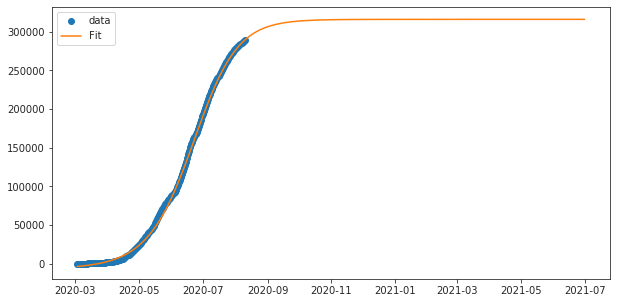

In [118]:
x_min = 0
x_max = 485                               #min/max values for x axis
x_fit = np.linspace(x_min, x_max, 486)   #range of x values used for the fit function

fig, ax = plt.subplots(figsize=(10,5))
ax.plot(df.Date, df.Confirmed, 'o', label='data')
ax.plot(X, generalised_richard(x_fit, *popt), '-', label='Fit')

plt.legend()
plt.show()

In [119]:
# nonlinear model
df.dtypes

t                     int64
Date         datetime64[ns]
new_cases           float64
Confirmed            object
dtype: object

In [120]:
gRichard=generalised_richard(x_fit, *popt).astype(int)

In [121]:
# gRichard

In [122]:
prediction = pd.DataFrame([X,gRichard])

In [123]:
prediction.T

,0,1
0,2020-03-03,-3761
1,2020-03-04,-3640
2,2020-03-05,-3515
3,2020-03-06,-3384
4,2020-03-07,-3248
...,...,...
481,2021-06-27,316206
482,2021-06-28,316206
483,2021-06-29,316206
484,2021-06-30,316206


In [124]:
dfRich = prediction.T

In [125]:
# dfRich.dtypes

In [126]:
dfRich=dfRich.rename(columns={dfRich.columns[0]: 'Date',dfRich.columns[1]: 'Accumulative'})

In [127]:
dfRich['New Cases']=dfRich['Accumulative'].diff()
dfRich['New Cases']=dfRich['New Cases'].astype(float)

In [128]:
dfRich[130:140]

,Date,Accumulative,New Cases
130,2020-07-11,224763,3187.0
131,2020-07-12,227888,3125.0
132,2020-07-13,230949,3061.0
133,2020-07-14,233946,2997.0
134,2020-07-15,236877,2931.0
135,2020-07-16,239740,2863.0
136,2020-07-17,242534,2794.0
137,2020-07-18,245259,2725.0
138,2020-07-19,247913,2654.0
139,2020-07-20,250497,2584.0


In [129]:
dfRich.Date = pd.to_datetime(dfRich.Date)
dfRich.set_index('Date', inplace=True)

Text(0, 0.5, 'New Cases')

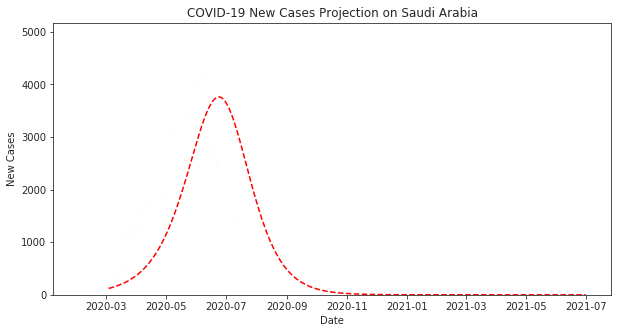

In [138]:
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(d_full[:len(data)], data, color='b',label='Actual')
# ax.bar(d_full, y_bar, color='black', label='Projected')
ax.plot(dfRich.index, dfRich['New Cases'], 'r--', label='Normal Distribution')

plt.title('COVID-19 New Cases Projection on Saudi Arabia')
plt.xlabel('Date')
plt.ylabel('New Cases')


In [131]:
def Rich(t, theta1, theta2, theta3,theta4):

    f = (theta1 * (1 - np.exp(-theta2 * np.exp(theta3 * t))**theta4))
    #    dydt = r (Y ** p) * (1 - (Y / K) ** alpha)

#     f = -(theta1* theta2 * (theta3**(theta4-1))) * t
#     𝑟𝑟 𝛼𝛼 𝐾𝐾𝑝𝑝−1
    return f

In [140]:
popt, pcov = curve_fit(Rich, df.index.values, df.Confirmed.values, maxfev = 8000)

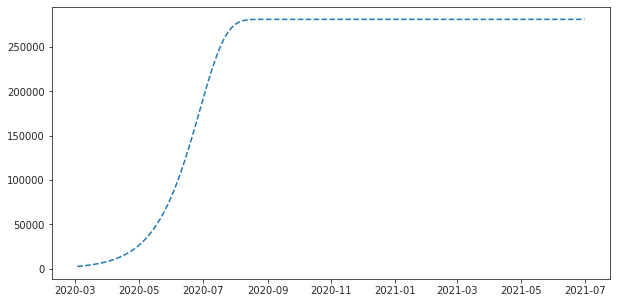

In [141]:
plt.plot(X, Rich(x_fit, *popt), '--', label='Fit')
# # plt.plot(df.Date, df.Confirmed, '-', label='data')
# plt.show()

In [142]:
def diff(Y, t, r, p, K, alpha):
    return r * (Y ** p) * (1 - (Y / K) ** alpha)

# def fun(params):
#     Y, r, p, K, alpha = params
#     return r * (Y ** p) * (1 - (Y / K) ** alpha)
#Returns residual: predicted - actual
def fun(p, x, y):
    return model(p, x) - y

In [143]:
test = dfConfirmed['Confirmed']
data = np.nan_to_num(np.array(test).astype(float))
x_val = list(range(len(data)))

In [144]:
# def obj(arguments)
#     """objective function, to be solved."""
#     x, arg_1, arg_2 = arguments[0], arguments[1], arguments[2] 
#     v_3 = f(x, arg_1, arg_2)
#     return abs(x-v_3)

# x0 = 1
# initial_guess = [1,1,1]  # initial guess can be anything
# result = minimize(obj, initial_guess)
# print result.x

In [145]:
# def fit(param):
#     Y,r, p, K, alpha = param
#     yy = (r * (Y ** p) * (1 - (Y / K) ** alpha))
#     return np.square(data - yy).sum()

In [146]:
# param0 = [1,0.5, 0.5, 400000,0.5]
# res = minimize(fit, param0, bounds=bnds)

In [147]:
# res.x

In [148]:
# from scipy.optimize import minimize

# bnds = ((1., np.inf), (0.01, 2.0),(0,1.1),(250000,600000),(0,1))
# initial_guess = [1,0.01, 0.5, 400000,0.]
# #scipy.optimize.minimize(fun, x0, args=(), method=None, jac=None, hess=None, hessp=None, bounds=None, constraints=(), tol=None, callback=None, options=None
# result = minimize(fun,initial_guess, method='TNC', bounds=bnds)
# Y,r,p,K,alpha=result.x

In [149]:
# Y, r, p, K, alpha
t

array([  0.        ,   1.00191939,   2.00383877,   3.00575816,
         4.00767754,   5.00959693,   6.01151631,   7.0134357 ,
         8.01535509,   9.01727447,  10.01919386,  11.02111324,
        12.02303263,  13.02495202,  14.0268714 ,  15.02879079,
        16.03071017,  17.03262956,  18.03454894,  19.03646833,
        20.03838772,  21.0403071 ,  22.04222649,  23.04414587,
        24.04606526,  25.04798464,  26.04990403,  27.05182342,
        28.0537428 ,  29.05566219,  30.05758157,  31.05950096,
        32.06142035,  33.06333973,  34.06525912,  35.0671785 ,
        36.06909789,  37.07101727,  38.07293666,  39.07485605,
        40.07677543,  41.07869482,  42.0806142 ,  43.08253359,
        44.08445298,  45.08637236,  46.08829175,  47.09021113,
        48.09213052,  49.0940499 ,  50.09596929,  51.09788868,
        52.09980806,  53.10172745,  54.10364683,  55.10556622,
        56.1074856 ,  57.10940499,  58.11132438,  59.11324376,
        60.11516315,  61.11708253,  62.11900192,  63.12

In [330]:
t = np.linspace(0, len(X), len(X))
# t = np.linspace(0, X, X)

y0 = df.Confirmed.iloc[0] # Your initial condition.
params = (0.6, 0.92, 350000, .11) # r, p, K, alpha
sol = odeint(diff, y0, t, args=params)

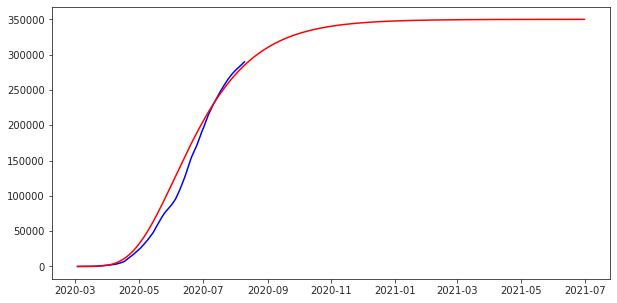

In [331]:
# r=2; p=1; K=1;  alpha=0.8;
# y0 = r, p, K, alpha
plt.plot(df.Date, df.Confirmed,'blue')
plt.plot(X, sol, 'red')

In [332]:
prediction = pd.DataFrame([X,sol])

In [333]:
pre  = prediction.T
pre=pre.rename(columns={pre.columns[0]: 'Date',pre.columns[1]: 'Accumulative'})

In [334]:
pre['Accumulative']=pre['Accumulative'].astype(int)
pre['New Cases'] = pre['Accumulative'].diff()
pre['New Cases'] = pre['New Cases'].fillna(0).astype(int)

In [335]:
pre[150:180]

,Date,Accumulative,New Cases
150,2020-07-31,269883,1697
151,2020-08-01,271550,1667
152,2020-08-02,273187,1637
153,2020-08-03,274795,1608
154,2020-08-04,276373,1578
155,2020-08-05,277923,1550
156,2020-08-06,279444,1521
157,2020-08-07,280937,1493
158,2020-08-08,282402,1465
159,2020-08-09,283840,1438


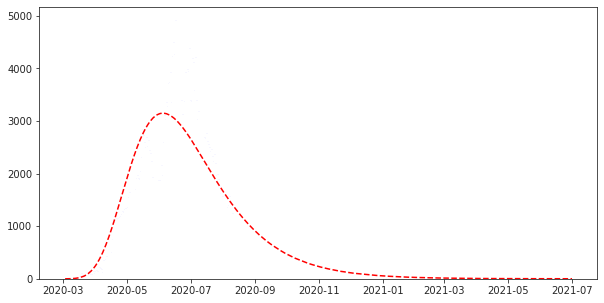

In [336]:
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(df.Date, df['new_cases'], color='b',label='Actual')
ax.plot(pre['Date'], pre['New Cases'], 'r--', label='GRM')
# ax.plot(df.Date, df.new_cases, '', label='data')
plt.show()

# df.Date[:len(data)]

In [337]:
# pre.to_csv('GeneralizedRichard.csv')

In [158]:
# ret = odeint(GRich, y0, t, args=(r, p, K, alpha))
# df.Confirmed.iloc[0]
# 
# prediction = pd.DataFrame([X,sol])

In [ ]:
# p, K, alpha = ret.T
# plt.plot(X, ret, 'b', alpha=1., lw=2, label='Predicted')
# plt.show()
# prediction.T

In [ ]:
# pre=prediction.T

In [ ]:
# pre=pre.rename(columns={pre.columns[0]: 'Date',pre.columns[1]: 'Accumulative'})

In [ ]:
# pre['New Cases'] = pre['Accumulative'].diff().astype(int)

In [ ]:
# pre

In [ ]:

# plt.rcParams["figure.figsize"] = [10, 5]

# fig = plt.figure(facecolor='w')
# ax = fig.add_subplot(111,  axisbelow=True)
# ax.plot(X, ret, 'b', alpha=1., lw=2, label='Predicted')

# plt.show()

In [ ]:
# popt, pcov = curve_fit(Rich, df.index.values, df.Confirmed.values, bounds=([0, 0, 0, 0],np.inf), maxfev = 8000)

In [ ]:
# popt

In [ ]:
# plt.plot(X, GRich(x_fit, *popt), '--', label='Fit')
# # plt.plot(df.Date, df.Confirmed, '-', label='data')
# plt.show()

In [177]:
def Gompertz(t, theta1, theta2, theta3):


    f = theta1 * np.exp(-theta2 * np.exp(-theta3 * t))
    return f

In [178]:
# x = list(dfConfirmed2['index'])
# y = list(dfConfirmed2['Confirmed'])

popt, pcov = curve_fit(Gompertz, df.index.values, df.Confirmed.values, maxfev = 8000)

In [179]:
popt

array([4.08433056e+05, 1.13532410e+01, 2.23639055e-02])

In [180]:
X

array(['2020-03-03T00:00:00.000000000', '2020-03-04T00:00:00.000000000',
       '2020-03-05T00:00:00.000000000', '2020-03-06T00:00:00.000000000',
       '2020-03-07T00:00:00.000000000', '2020-03-08T00:00:00.000000000',
       '2020-03-09T00:00:00.000000000', '2020-03-10T00:00:00.000000000',
       '2020-03-11T00:00:00.000000000', '2020-03-12T00:00:00.000000000',
       '2020-03-13T00:00:00.000000000', '2020-03-14T00:00:00.000000000',
       '2020-03-15T00:00:00.000000000', '2020-03-16T00:00:00.000000000',
       '2020-03-17T00:00:00.000000000', '2020-03-18T00:00:00.000000000',
       '2020-03-19T00:00:00.000000000', '2020-03-20T00:00:00.000000000',
       '2020-03-21T00:00:00.000000000', '2020-03-22T00:00:00.000000000',
       '2020-03-23T00:00:00.000000000', '2020-03-24T00:00:00.000000000',
       '2020-03-25T00:00:00.000000000', '2020-03-26T00:00:00.000000000',
       '2020-03-27T00:00:00.000000000', '2020-03-28T00:00:00.000000000',
       '2020-03-29T00:00:00.000000000', '2020-03-30

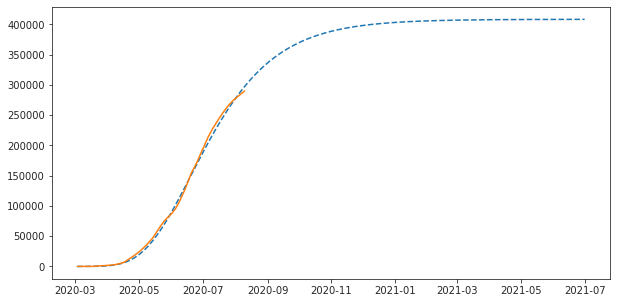

In [181]:
plt.plot(X, Gompertz(x_fit, *popt), '--', label='Fit')
plt.plot(df.Date, df.Confirmed, '-', label='data')
plt.show()

In [182]:
gmp=Gompertz(x_fit, *popt).astype(int)

In [183]:
X

array(['2020-03-03T00:00:00.000000000', '2020-03-04T00:00:00.000000000',
       '2020-03-05T00:00:00.000000000', '2020-03-06T00:00:00.000000000',
       '2020-03-07T00:00:00.000000000', '2020-03-08T00:00:00.000000000',
       '2020-03-09T00:00:00.000000000', '2020-03-10T00:00:00.000000000',
       '2020-03-11T00:00:00.000000000', '2020-03-12T00:00:00.000000000',
       '2020-03-13T00:00:00.000000000', '2020-03-14T00:00:00.000000000',
       '2020-03-15T00:00:00.000000000', '2020-03-16T00:00:00.000000000',
       '2020-03-17T00:00:00.000000000', '2020-03-18T00:00:00.000000000',
       '2020-03-19T00:00:00.000000000', '2020-03-20T00:00:00.000000000',
       '2020-03-21T00:00:00.000000000', '2020-03-22T00:00:00.000000000',
       '2020-03-23T00:00:00.000000000', '2020-03-24T00:00:00.000000000',
       '2020-03-25T00:00:00.000000000', '2020-03-26T00:00:00.000000000',
       '2020-03-27T00:00:00.000000000', '2020-03-28T00:00:00.000000000',
       '2020-03-29T00:00:00.000000000', '2020-03-30

In [184]:
prediction = pd.DataFrame([X,gmp])

In [185]:
prediction.T

,0,1
0,2020-03-03,4
1,2020-03-04,6
2,2020-03-05,7
3,2020-03-06,10
4,2020-03-07,12
...,...,...
481,2021-06-27,408334
482,2021-06-28,408336
483,2021-06-29,408338
484,2021-06-30,408340


In [186]:
gmpCurve=prediction.T

In [187]:
GompertzCruve=gmpCurve.rename(columns={gmpCurve.columns[0]: 'Date',gmpCurve.columns[1]: 'Accumulative'})

In [188]:
GompertzCruve['New Cases']=GompertzCruve['Accumulative'].diff()

In [339]:
# GompertzCruve.tail(20)
GompertzCruve[300:320]

,Date,Accumulative,New Cases
300,2020-12-28,402816,126
301,2020-12-29,402939,123
302,2020-12-30,403060,121
303,2020-12-31,403178,118
304,2021-01-01,403293,115
305,2021-01-02,403406,113
306,2021-01-03,403517,111
307,2021-01-04,403625,108
308,2021-01-05,403731,106
309,2021-01-06,403834,103


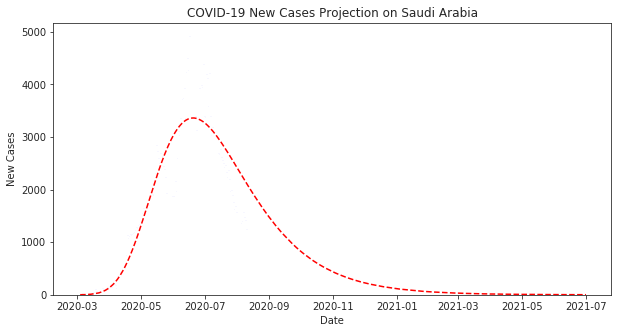

In [190]:
# GompertzCruve.plot()
# fig = plt.figure()
# GompertzCruve.set_index('Date')[['New Cases']].plot(style='.-',legend=True, grid=True)
# df.
# plt.title("COVID-19 in Saudi Arabia")
# plt.xlabel("Dates")df['Date'], df['new_cases']
# plt.ylabel("Number of cases")
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(df['Date'], df['new_cases'], color='b',label='Actual')
# ax.bar(d_full, y_bar, color='black', label='Projected')
ax.plot(GompertzCruve['Date'], GompertzCruve['New Cases'], 'r--', label='Normal Distribution')

plt.title('COVID-19 New Cases Projection on Saudi Arabia')
plt.xlabel('Date')
plt.ylabel('New Cases')


plt.show()

In [338]:
# GompertzCruve.to_csv('GompertzCruve.csv')

In [ ]:
# def curve_plot(x_train, y_train, est):
#     plt.figure(figsize = (12, 5))
#     plt.xlabel('Days')
#     plt.ylabel('Cases')
#     plt.title('Saudi')
#     plt.scatter(x_train, y_train, color = 'r')
#     plt.plot(x_train, Gompertz(x_train, *est), label = 'Fitting curve (train)')
# #     plt.plot(x_test, Gompertz(x_test, *est), label = 'Fitting curve (test)')
# #     plt.axvline(x = test_start, color = 'r', linestyle = ':', label = 'test_start = %.f' % (test_start))
# #     plt.axvline(x = train_end, color = 'b', linestyle = ':', label = 'train_end = %.f' % (train_end))
#     plt.legend()
#     plt.show()

In [ ]:
# curve_plot(df.index,df.Confirmed, est = popt)

In [ ]:
def log_curve(x, k, x_0, ymax):
    return ymax / (1 + np.exp(-k*(x-x_0)))

In [ ]:
popt, pcov = curve_fit(log_curve, df.index, df.Confirmed, bounds=([0,0,0],np.inf))

In [ ]:
# plt.plot(x_fit, log_curve(x_fit, *popt), '-', label='Fit')
# plt.plot(df.index, df.Confirmed, 'o', label='data')
# plt.show()

In [ ]:
# def func(x,a,b,c,d,k):
#     return k*(a/(1+(np.exp(-b*(x-c)))) + d) #logistic function.

In [ ]:
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

In [ ]:
# df = pd.read_csv('Analysis/All Items Long Description.csv')
# df_confirmed = pd.read_csv('Analysis/df_confirmed.csv')

In [ ]:
# df.tail()

In [ ]:
# df.shape

In [ ]:
# len(df['Unspsc Material Group Desc'].unique())

In [ ]:
# df.loc[df['Unspsc Material Group Desc'] == 'Bottles']

In [ ]:
# df.loc[df['Material'] == 689260] 